# Star Cluster Simulation

In this project I will use data from a dataset of [Star Cluster Simulations](https://www.kaggle.com/mariopasquato/star-cluster-simulations) of a direct N-body simulation of, at the beginning, 64,000 stars. The data contains the x, y, z and locations of each star as well as velocities in x,y,z over the course of time from T = 0000 to T = 1600. The data is  in 16 files to show this information at each timestamp, in increments of 100. The simulation data shows how the stars move and at which speed, within the cluster, and for some of them, ultimately exiting the cluster. 

According to the acknowledgements at the source, this simulation was originally run at Yonsei University (Seoul, Korea). 

First I will explore the data to get a sense of it, then seek to answer the following questions:

<ol>
<li>Given the location of a star over a number of sequential times, can you predict the movement of a separate star?</li>

<li>Given the velocities of a series of stars up until T = 0500, can you predict the velocities after that timestamp?</li>

<li>Did the velocity profile play a significant role in determining which stars would exit the cluster?</li>
</ol>

## Data exploration

In [82]:
# all of the import statements

import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [36]:
# getting the data and organizing it
# files are datasets/star-cluster-simulations/c_0000.csv - c_1800.csv, increments of 100
# stars from 0 through 6399

filenames = {}

orderedid = {}

# generate list from 00 to 18 ? 
listnum = ['00', '01','02','03','04','05',
           '06','07','08','09','10','11','12',
           '13','14','15','16','17','18']

for i in listnum:
    # just taking the data
    filenames[i] = pd.read_csv('datasets/star-cluster-simulations/c_{}00.csv'.format(i))
    # putting it in a new table, ordered by the star id 
    orderedid[i] =  filenames[i].reindex(index=filenames[i]['id'])
    del orderedid[i]['id']

# to get a glimpse of what the data looks like at each timestamp, uncomment this
# orderedid['00'].iloc[:3,:]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


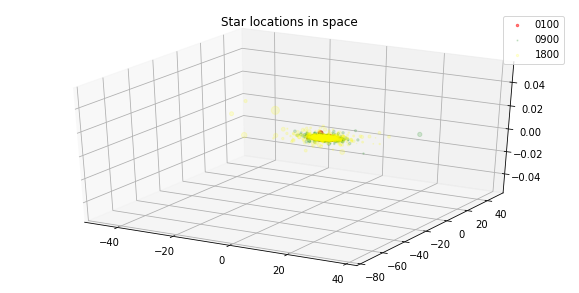

In [34]:
# visualizing the cluster by plotting all of the stars locations from T = 0000 to T = 1800

plt.figure(figsize=(10,5)).gca(projection='3d')
plt.scatter(filenames['01'].loc[:,'x'], filenames['01'].loc[:,'y'], filenames['01'].loc[:,'z'], 
            color='red', alpha=.50, label='0100'
)
plt.scatter(filenames['09'].loc[:,'x'], filenames['09'].loc[:,'y'], filenames['09'].loc[:,'z'],
               color='green',alpha=.15, label='0900'
           )
plt.scatter(filenames['18'].loc[:,'x'], filenames['18'].loc[:,'y'], filenames['18'].loc[:,'z'],
           color='yellow', alpha=.15,label='1800')

plt.title('Star locations in space')
plt.legend()
plt.show()

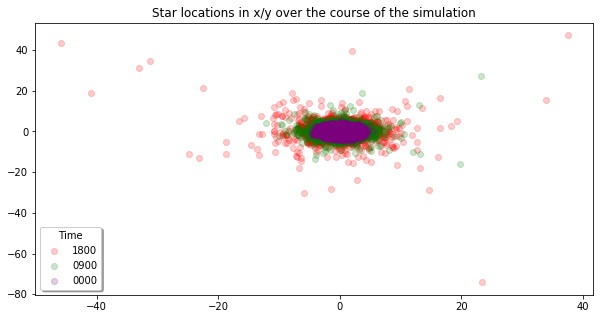

In [35]:
# rendering the locations in x/y, and looking at the star locations over 3 different times

plt.figure(figsize=(10,5))
plt.scatter(x=filenames['18'].loc[:,'x'], y=filenames['18'].loc[:,'y'], 
           color='red', alpha=.20,label='1800'
           )
plt.scatter(x=filenames['09'].loc[:,'x'], y=filenames['09'].loc[:,'y'],
               color='green',alpha=.20, label='0900'
           )
plt.scatter(x=filenames['00'].loc[:,'x'], y=filenames['00'].loc[:,'y'],
               color='purple',alpha=.20, label='0000'
           )

plt.title('Star locations in x/y over the course of the simulation')
plt.legend(shadow=True, title='Time')
plt.show()

From looking at the stars' locations in the cluster over time, it appears that at T = 0000 the stars are more concentrated around the centroid, and over the course of the simulation, they spread out further and further, though for the most part, retain the same general shape / center.

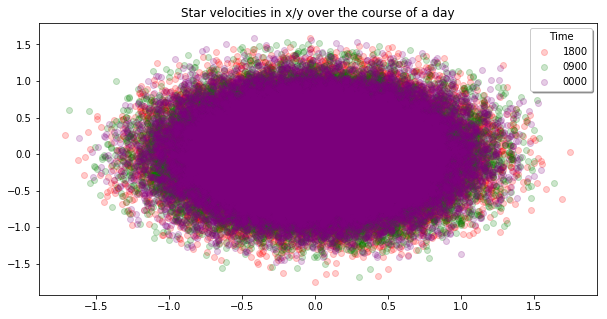

In [15]:
# all stars velocities over the course of the day in vx, vy

plt.figure(figsize=(10,5))
plt.scatter(x=orderedid['18'].loc[:,'vx'], y=orderedid['18'].loc[:,'vy'], 
           color='red', alpha=.20,label='1800'
           )
plt.scatter(x=orderedid['09'].loc[:,'vx'], y=orderedid['09'].loc[:,'vy'],
               color='green',alpha=.20, label='0900'
           )
plt.scatter(x=orderedid['00'].loc[:,'vx'], y=orderedid['00'].loc[:,'vy'],
               color='purple',alpha=.20, label='0000'
           )

plt.title('Star velocities in x/y over the course of a day')
plt.legend(shadow=True, title='Time')
plt.show()

Visualizing the velocity information (vx,vy) also seems to support the previous assumption.

In [31]:
# since the stars are clustered around a center, what is that center point?

# getting the mean of x, y, z, to get the cluster "center" at each time

mean_x = []
mean_y = []
mean_z = []

for num in listnum:
    mean_x.append(np.mean(filenames[num].loc[:,'x']))
    mean_y.append(np.mean(filenames[num].loc[:,'y']))
    mean_z.append(np.mean(filenames[num].loc[:,'z']))

centroid = pd.DataFrame(index=listnum)
centroid['x'] = mean_x
centroid['y'] = mean_y
centroid['z'] = mean_z

centroid

,x,y,z
00,-1.176595e-10,3.412734e-10,2.464757e-10
01,2.750745e-05,9.237395e-04,-3.431984e-04
02,-1.445949e-03,3.365790e-03,-5.762731e-04
03,-6.491956e-03,7.228926e-03,-1.250761e-03
04,-1.268588e-02,1.339715e-02,-1.657701e-03
05,-1.994709e-02,1.853387e-02,-1.174266e-03
06,-2.815595e-02,2.453804e-02,-1.029976e-03
07,-3.775023e-02,3.304917e-02,6.543372e-04
08,-4.520098e-02,4.246163e-02,1.570002e-03
09,-4.979455e-02,5.113649e-02,1.574555e-03


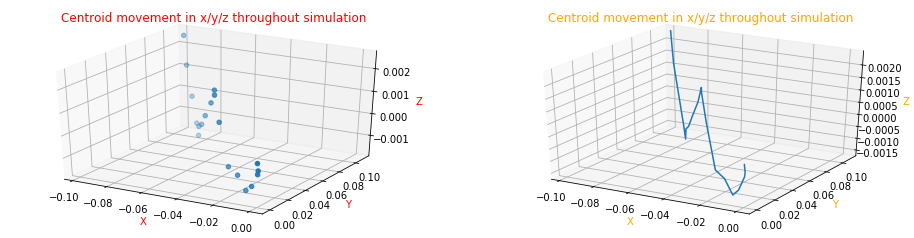

In [38]:
# Visualizing the movement of the centroid might give a clearer idea of the 
# movement of the cluster over time. It could be useful to see the data as a scatter plot,
# in order to see how each point relates to the next, and also as a line plot, 
# to keep the sense of continual movement.

from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt
#import numpy as np

fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(mean_x, mean_y, mean_z)
ax.set_xlabel('X', color='red')
ax.set_ylabel('Y', color='red')
ax.set_zlabel('Z', color='red')
plt.title('Centroid movement in x/y/z throughout simulation', color='red')

ax = fig.add_subplot(122, projection='3d')
ax.plot(mean_x,mean_y,mean_z)
ax.set_xlabel('X', color='orange')
ax.set_ylabel('Y', color='orange')
ax.set_zlabel('Z', color='orange')
plt.title('Centroid movement in x/y/z throughout simulation', color='orange')

    
plt.show()

## Questions

# 1 - Given the location of a star over a number of sequential times, can you predict the movement of a separate star?

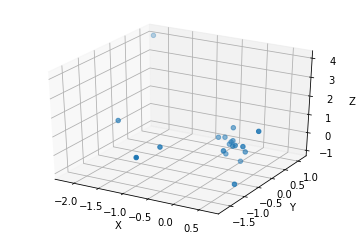

In [39]:
# show how 1 star is moving in order to predict a separate star based on this

star = 6399

one_x = []
one_y = []
one_z = []

for i in listnum:
    one_x.append(orderedid[i].at[star,'x'])
    one_y.append(orderedid[i].at[star,'y'])
    one_z.append(orderedid[i].at[star,'z'])   
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(one_x, one_y, one_z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
    
plt.show()

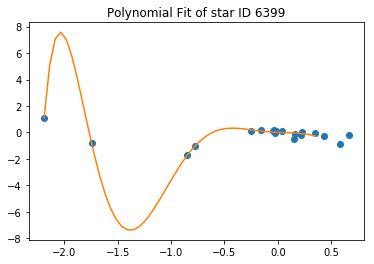

In [42]:
# fit a polynomial based on that star

z = np.polyfit(one_x,one_y,7)
f = np.poly1d(z)

x_new = np.linspace(one_x[0], one_x[-1], 50)
y_new = f(x_new)

plt.plot(one_x,one_y,'o', x_new, y_new)
plt.title('Polynomial Fit of star ID {}'.format(star))
ax = plt.gca()
fig = plt.gcf()


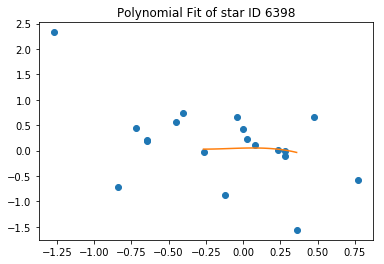

In [43]:
# given that polynomial, guess a neighboring stars projected location

star2 = star-1

two_x = []
two_y = []
two_z = []

for i in listnum:
    two_x.append(orderedid[i].at[star2,'x'])
    two_y.append(orderedid[i].at[star2,'y'])
    two_z.append(orderedid[i].at[star2,'z']) 
    
# just through :12 in order to estimate the rest based off the polynomial
z2 = np.polyfit(two_x,two_y,3)
f2 = np.poly1d(z2)

x2_new = np.linspace(two_x[0], two_x[-1], 50)
y2_new = f2(x2_new)

plt.plot(two_x,two_y,'o', x2_new, y2_new)
#plt.plot(two_x, two_y, 'o', x2_new)
plt.title('Polynomial Fit of star ID {}'.format(star2))
ax = plt.gca()
fig = plt.gcf()

Even though the cluster is very closely concentrated, it seems like basing a star's trajectory on the neighboring star isn't effective. Using multiple stars information instead might be better idea. 

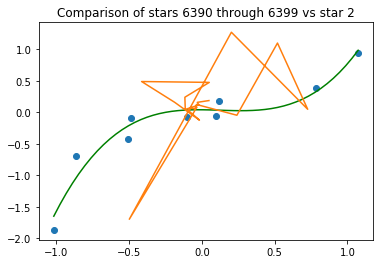

In [48]:
multistars = []

# i'm going to use data from stars 6390 - 6399 
# and compare with a star - maybe 2

compare = 2

x_of2 = []
y_of2 = []

multi_x = []
multi_y = []

x = 0
    
for i in listnum:
    x_of2.append(orderedid[i].at[compare,'x'])
    y_of2.append(orderedid[i].at[compare,'y'])
    while x < 9:
        star = star-x
        multi_x.append(orderedid[i].at[star,'x'])
        multi_y.append(orderedid[i].at[star,'y'])
        x +=1
        
multi_x = sorted(multi_x)
multi_y = sorted(multi_y)

z3 = np.polyfit(multi_x,multi_y,3)
f3 = np.poly1d(z3)

x_new2 = np.linspace(multi_x[0], multi_x[-1], 50)
y_new2 = f3(x_new2)

plt.plot(multi_x,multi_y,'o', x_new2, y_new2, 'g', x_of2, y_of2)
plt.title('Comparison of stars 6390 through 6399 vs star 2'.format(star))
ax = plt.gca()
fig = plt.gcf()

This plot has the locations (x,y) of multiple stars (6390 through 6399) plotted as the blue dots, with the green line being the polynomial that fits it. It appears that the trajectory of those stars, in one section of the cluster, are quite different from that of star number 2 (plotted in orange). This seems to hint that the stars that are further away from each other have more different movements than those that are close together.

# 2 - Given the velocities of a series of stars up until T = 0500, can you predict the velocities after that timestamp?

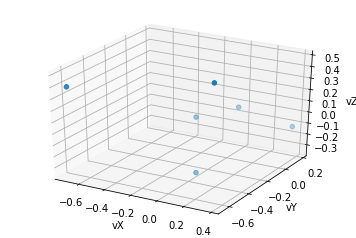

      5        4        3         2
5995 x + 1928 x - 1764 x - 24.13 x + 41.51 x - 1.195


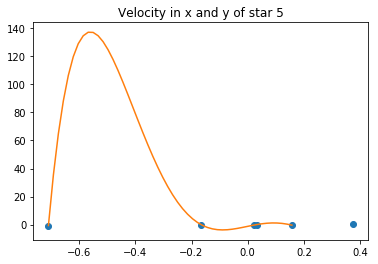

In [51]:
# first get the velocities for stars up until T = 0500

vxes = []
vys = []
vzs = []

for i in listnum:
    vxes.append(orderedid[i].at[5,'vx'])
    vys.append(orderedid[i].at[5,'vy'])
    vzs.append(orderedid[i].at[5,'vz'])
    if i == '05':
        break
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vxes, vys, vzs)
ax.set_xlabel('vX')
ax.set_ylabel('vY')
ax.set_zlabel('vZ')
    
plt.show()

# fit it to a polynomial in order to try and guess the next velocities

try1 = np.polyfit(vxes,vys,5)

newf = np.poly1d(try1)
print (newf)

# calculate new x's and y's
vx_new = np.linspace(vxes[0], vxes[-1], 50)
vy_new = newf(vx_new)


plt.plot(vxes,vys,'o', vx_new, vy_new)
plt.title('Velocity in x and y of star 5')
ax = plt.gca()
fig = plt.gcf()

First, I gathered the velocity (vx and vy) of star ID number 5 from T = 0000 until T = 0500, and then I tried to fit the data into a polynomial, with the intention of using that polynomial to guess the upcoming vx and vys of the same star. From the graph it appears that the polynomial may have been on the right path, but the spike without a defined point (at x = -0.5) raises questions.

# 3 - Did the velocity profile play a significant role in determining which stars would exit the cluster?

In [54]:
# in order to assess this, we have to separate the cluster into two groups, one group of 
# stars that stay within the cluster, and the other a group that exits the cluster, and then
# compare the two

# this is the group that exits the cluster

greater = filenames['18'][filenames['18']['x'] >= 15] 
lesser = filenames['18'][filenames['18']['x'] <= -15]

outer = pd.concat([greater,lesser])

outer

# make a list of the IDs so i can use that info later
outer_ids = outer['id'].tolist()
#inner = filenames['18'][filenames['18']['x'] > -15 & [filenames['18']['x'] < 15]]

#half = filenames['18'][filenames['18']['x'] < 15]
#half2 = filenames['18'][filenames['18']['x'] > -15] 

# and this is the group that stays closer... a much larger group
inner = filenames['18'].query('(x < 15) & (x > -15)')

# also getting a list of just their ids
inner_ids = inner['id'].tolist()

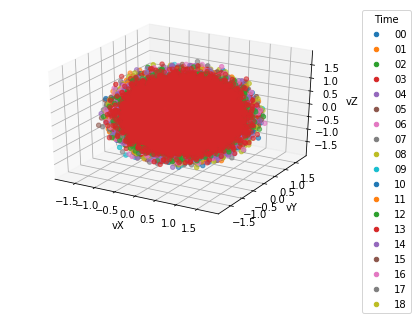

In [57]:
# getting velocities over time of inner cluster only

inner_vxes = {}
inner_vys = {}
inner_vzs = {}

# by time...
for i in listnum:
    temp_x = []
    temp_y = []
    temp_z = []
    # by star id
    for star_id in inner_ids:
            temp_x.append(orderedid[i].at[star_id,'vx'])
            inner_vxes[i] = temp_x
                
            temp_y.append(orderedid[i].at[star_id,'vy'])
            inner_vys[i] = temp_y
            
            temp_z.append(orderedid[i].at[star_id,'vz'])
            inner_vzs[i] = temp_z
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in listnum:
    ax.scatter(inner_vxes[i], inner_vys[i], inner_vzs[i],label=i)
ax.set_xlabel('vX')
ax.set_ylabel('vY')
ax.set_zlabel('vZ')
ax.legend(title='Time',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

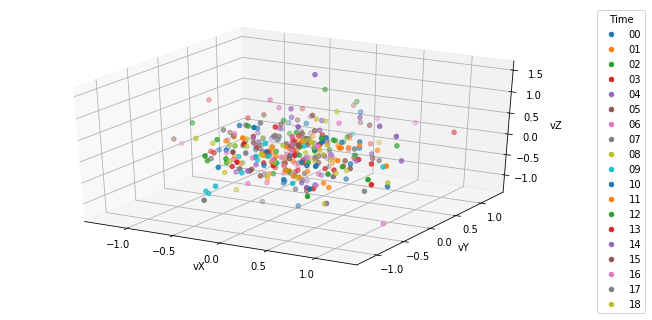

In [56]:
# getting velocities over time of outer cluster only

outer_vxes = {}
outer_vys = {}
outer_vzs = {}

# by time...
for i in listnum:
    temp_x = []
    temp_y = []
    temp_z = []
    # by star id
    for star_id in outer_ids:
            temp_x.append(orderedid[i].at[star_id,'vx'])
            outer_vxes[i] = temp_x
                
            temp_y.append(orderedid[i].at[star_id,'vy'])
            outer_vys[i] = temp_y
            
            temp_z.append(orderedid[i].at[star_id,'vz'])
            outer_vzs[i] = temp_z

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

for i in listnum:
    ax.scatter(outer_vxes[i], outer_vys[i], outer_vzs[i],label=i)

ax.set_xlabel('vX')
ax.set_ylabel('vY')
ax.set_zlabel('vZ')
ax.legend(title='Time',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

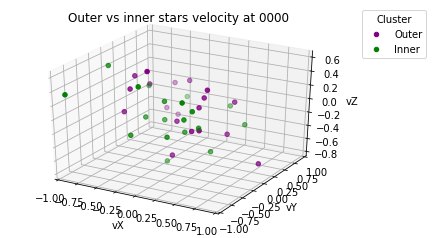

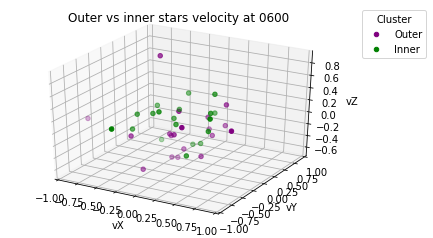

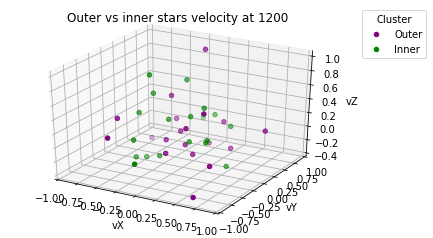

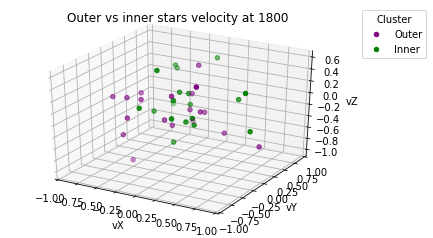

In [58]:
# compare velocities of each group for 4 different hours - 00, 06, 12, 18

for i in range(0,19,6):
    meh = listnum[i]
    filenames[listnum[i]]
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    ax.scatter(outer_vxes[meh], outer_vys[meh], outer_vzs[meh],label='Outer', color='purple')
    
    try_x = sorted(inner_vxes[meh])
    try_y = sorted(inner_vys[meh])
    try_z = sorted(inner_vzs[meh])
    
    vx_i_new = np.random.choice(try_x, size=19)
    vy_i_new = np.random.choice(try_y, size=19)
    vz_i_new = np.random.choice(try_z, size=19)
    
    ax.scatter(vx_i_new, vy_i_new, vz_i_new,label='Inner', color='green')

    ax.set_xlabel('vX')
    ax.set_ylabel('vY')
    ax.set_zlabel('vZ')
    plt.title('Outer vs inner stars velocity at {}00'.format(meh))
    ax.legend(title='Cluster',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Just quickly looking over the plots, it doesn't appear that the velocities in each group are especially different. Next, I took a look at the distribution in order to see if I could use a t-test, or needed to use a separate test, to test the statistical significance of the differences.

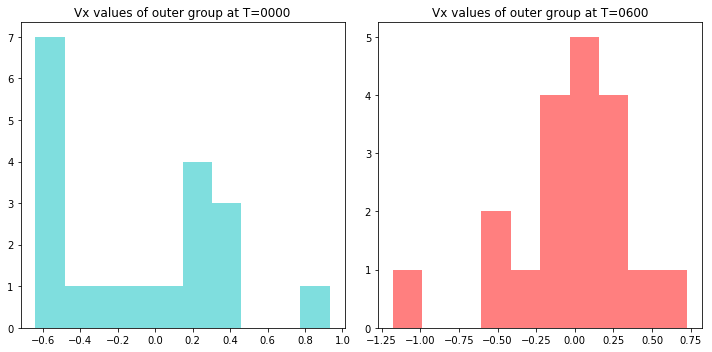

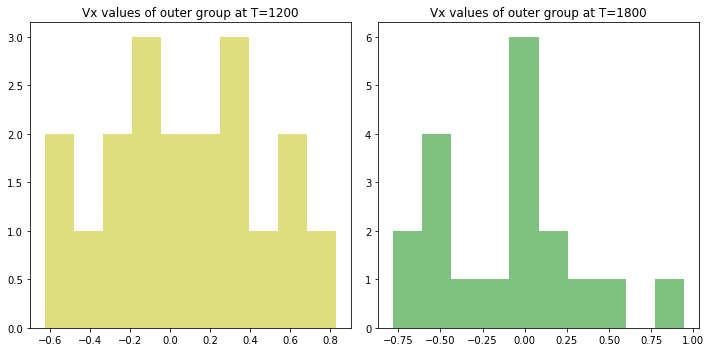

In [89]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(sorted(outer_vxes['00']), color='c', alpha=.5)
plt.title('Vx values of outer group at T=0000')

plt.subplot(1, 2, 2)
plt.hist(sorted(outer_vxes['06']), color='r', alpha=.5)
plt.title('Vx values of outer group at T=0600')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.hist(sorted(outer_vxes['12']), color='y', alpha=.5)
plt.title('Vx values of outer group at T=1200')

plt.subplot(1, 2, 2)
plt.hist(sorted(outer_vxes['18']), color='g', alpha=.5)
plt.title('Vx values of outer group at T=1800')
plt.tight_layout()
plt.show()

The variance of the outer group's vx as well as vy doesn't appear to have normal distribution, so just to be safe, I decided to use the Mann-Whitney U test to check for statistically significant difference between the two groups, since the t-test will only work on a normal distribution.

In [90]:
mannus = []

for i in listnum:
    mannus.append(scipy.stats.mannwhitneyu(inner_vxes[i], 
                            outer_vxes[i], use_continuity=True, alternative=None))

print('Max value: {}'.format(max(mannus)))
print('Min value: {}'.format(min(mannus)))

Max value: MannwhitneyuResult(statistic=601038.0, pvalue=0.467835017051349)
Min value: MannwhitneyuResult(statistic=460255.0, pvalue=0.033628649346191308)


It looks like the differences aren't statistically significant, so maybe going by the velocity as in vx only did not provide enough information to determine if a specific star would stay within the cluster or exit it eventually.

## Ideas for further exploration

It might be a good idea to look at the entire velocity profile (as in, including vy and vz) and potentially see if looking at all of that information together would differentiate the two groups (inner and outer) in a meaningful way.

Something else that could be a predictor of whether or not the star exits the cluster might be the location of the star at a certain timestamp, i.e., if at T=1600 the star was already located beyond a certain point in x,y,z, the chance of it exiting the cluster is high. I only looked at the velocity, but thinking of the location could also be important, due to impact of the the gravitational pull of the cluster on each star.